In [119]:
import os
import json
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

In [120]:
def load_json(json_path):
    with open(json_path) as fhand:
        return json.load(fhand)

pretty_labels = {
    'CarbonDioxide_1_298K_2.5bar_mol': 'From CO$_2$ at 298 K and 2.5 bar',
    'CarbonDioxide_1_298K_0.5bar_mol_kg': 'CO$_2$ uptake at 298 K and 0.5 bar',
    'Methane_1_298K_0.5bar_mol': 'From CH$_4$ at 298 K and 0.5 bar',
    'Methane_1_298K_0.05bar_mol_kg': 'CH$_4$ uptake at 298 K and 0.05 bar',
    'Hydrogen_1_77K_100bar_g': 'From H$_2$ at 77 K and 100 bar',
    'Hydrogen_1_77K_2bar_g_l': 'H$_2$ uptake at 77 K and 2 bar',
    'multitask_geom_ads': 'From multitasking',
    'Xenon_0.2_273K_1bar_mol_kg': 'Xe binary uptake at 273 K and 1 bar',
    'Krypton_0.8_273K_5bar_mol_kg': 'Kr binary uptake at 273 K and 5 bar',
    'Krypton_0.8_273K_10bar_mol_kg': 'Kr binary uptake at 273 K and 10 bar',
    'Xenon_0.2_273K_5bar_mol_kg': 'Xe binary uptake at 273 K and 5 bar',
    'Xenon_0.2_273K_10bar_mol_kg': 'Xe binary uptake at 273 K and 10 bar',
    'Krypton_0.8_273K_1bar_mol_kg': 'Kr binary uptake at 273 K and 1 bar',
    # For UO database
    'CO2_uptake_P0.15bar_T298K [mmol_g]': 'CO$_2$ uptake at 298 K and 0.15 bar',
    'CO2_uptake_P0.10bar_T363K [mmol_g]': 'CO$_2$ uptake at 363 K and 0.10 bar',
    'logSelectivity': 'CO$_2$/N$_2$ selectivity (log)',
    'working_capacity_vacuum_swing [mmol_g]': 'CO$_2$ working capacity (vacuum swing)',
    'working_capacity_temperature_swing [mmol_g]': 'CO$_2$ working capacity (temperature swing)',
    'CO2_binary_uptake_P0.15bar_T298K [mmol_g]': 'CO$_2$ binary uptake at 298 K and 0.15 bar',
    'N2_binary_uptake_P0.85bar_T298K [mmol_g]': 'N$_2$ binary uptake at 298 K and 0.85 bar',
    'excess_CO2_uptake_P0.15bar_T298K [mmol_g]': 'excess CO$_2$ uptake at 298 K and 0.15 bar',
    'excess_CO2_uptake_P0.10bar_T363K [mmol_g]': 'excess CO$_2$ uptake at 363 K and 0.10 bar',
    'excess_CO2_binary_uptake_P0.15bar_T298K [mmol_g]': 'excess CO$_2$ binary uptake at 298 K and 0.15 bar',
    # For COFs database
    'absolute methane uptake low P [v STP_v]': 'CH$_4$ uptake at 298 K and 5.8 bar (COFs)',
	'absolute methane uptake high P [v STP_v]': 'CH$_4$ uptake at 298 K and 65 bar (COFs)',
	'deliverable capacity [v STP_v]': 'CH$_4$ delievarable capacity (COFs)',
    # For Tobacco database
    'Xenon_0.2_298K_1bar_mmol_g': 'Xe binary uptake at 298 K and 1 bar',
    'Krypton_0.8_298K_1bar_mmol_g': 'Kr binary uptake at 298 K and 1 bar',
    'Xenon_0.2_298K_5bar_mmol_g': 'Xe binary uptake at 298 K and 5 bar',
    'Krypton_0.8_298K_5bar_mmol_g': 'Kr binary uptake at 298 K and 5 bar',
	'Methane_1_298K_65bar_cm3(STP)_cm3': 'CH$_4$ uptake at 298 K and 65 bar',
	'Methane_1_298K_100bar_cm3(STP)_cm3': 'CH$_4$ uptake at 298 K and 100 bar',
	'Methane_1_298K_6bar_cm3(STP)_cm3': 'CH$_4$ uptake at 298 K and 6 bar',
	'Hydrogen_1_77K_100bar_g_l': 'H$_2$ uptake at 77 K and 100 bar',
	'Hydrogen_1_77K_6bar_g_l': 'H$_2$ uptake at 77 K and 6 bar',
	'Hydrogen_1_130K_100bar_g_l': 'H$_2$ uptake at 130 K and 100 bar',
	'Hydrogen_1_200K_100bar_g_l': 'H$_2$ uptake at 200 K and 100 bar',
	'Hydrogen_1_243K_100bar_g_l': 'H$_2$ uptake at 243 K and 100 bar',
	'Hydrogen_1_160K_5bar_g_l': 'H$_2$ uptake at 160 K and 5 bar',
	'Methane_1_298K_6bar_kj_mol': 'CH$_4$ adsorption energy at 298 K and 6 bar',
    # Common
    'scratch': 'Scratch training',
    'multitask_final_all': 'From multitasking (lineval)',
    'multitask_final_all_augmentation': 'From multitasking (lineval + aug)',
    'ml_experiments_augmentation_cubic_boltzmann_final_all_lightning_logs_version_0_checkpoints_best.ckpt': 'From multitasking (finetune)',
}

### Visualize results

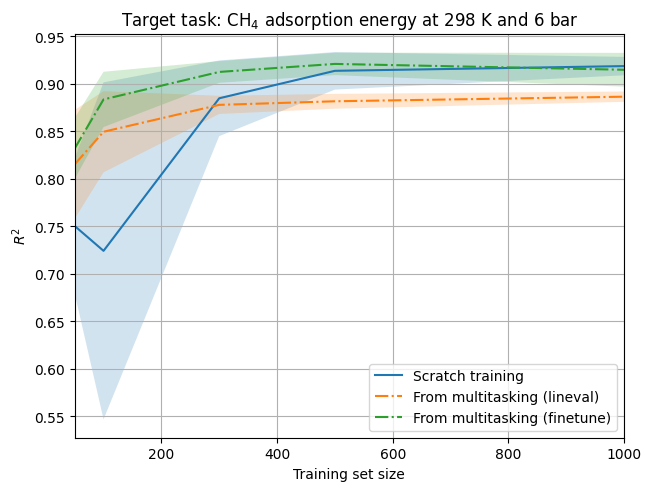

In [134]:
train_sizes = [50, 100, 300, 500, 1000]
metric = 'test_R2Score'
#metric = 'test_MeanAbsoluteError'

#target_task = 'Methane_1_298K_0.05bar_mol_kg'
#target_task = 'CarbonDioxide_1_298K_0.5bar_mol_kg'
#target_task = 'Hydrogen_1_77K_2bar_g_l'
#target_task = 'Xenon_0.2_273K_1bar_mol_kg'
#target_task = 'Krypton_0.8_273K_5bar_mol_kg'
#target_task = 'Krypton_0.8_273K_10bar_mol_kg'
target_task = 'Xenon_0.2_273K_5bar_mol_kg'
target_task = 'Xenon_0.2_273K_10bar_mol_kg'
target_task = 'Krypton_0.8_273K_1bar_mol_kg'

target_task = 'CO2_uptake_P0.15bar_T298K [mmol_g]'
target_task = 'CO2_uptake_P0.10bar_T363K [mmol_g]'
#target_task = 'CO2_binary_uptake_P0.15bar_T298K [mmol_g]'
#target_task = 'N2_binary_uptake_P0.85bar_T298K [mmol_g]'
#target_task =  'working_capacity_temperature_swing [mmol_g]'
#target_task =  'working_capacity_vacuum_swing [mmol_g]'
target_task =  'logSelectivity'
#target_task = 'excess_CO2_uptake_P0.10bar_T363K [mmol_g]'
#target_task = 'excess_CO2_binary_uptake_P0.15bar_T298K [mmol_g]'

#target_task = 'absolute methane uptake low P [v STP_v]'
#target_task = 'absolute methane uptake high P [v STP_v]'
#target_task = 'deliverable capacity [v STP_v]'

target_task = 'Xenon_0.2_298K_1bar_mmol_g'
target_task = 'Krypton_0.8_298K_1bar_mmol_g'
target_task = 'Xenon_0.2_298K_5bar_mmol_g'
target_task = 'Krypton_0.8_298K_5bar_mmol_g'
target_task = 'Methane_1_298K_65bar_cm3(STP)_cm3'
target_task = 'Methane_1_298K_100bar_cm3(STP)_cm3'
target_task = 'Methane_1_298K_6bar_cm3(STP)_cm3'
target_task = 'Hydrogen_1_77K_100bar_g_l'
target_task = 'Hydrogen_1_77K_6bar_g_l'
target_task = 'Hydrogen_1_130K_100bar_g_l'
target_task = 'Hydrogen_1_200K_100bar_g_l'
target_task = 'Hydrogen_1_243K_100bar_g_l'
target_task = 'Hydrogen_1_160K_5bar_g_l'
target_task = 'Methane_1_298K_6bar_kj_mol'

fig, ax = plt.subplots(layout='constrained')

if 'Hydrogen' in target_task:
    max_performance = 0.995 if 'R2' in metric else 0.404
elif 'Methane' in target_task:
    max_performance = 0.887 if 'R2' in metric else 0.015
elif 'Carbon' in target_task:
    max_performance = 0.901 if 'R2' in metric else 0.292
    
# Plot performance of model trained with all data (single task).
#ax.axhline(max_performance, color='k', label='Scratch training (≈100k data)')
#ax.axhline(0.859, color='k', label='Scratch training (≈32k data, RetNet)')

for json_path in sorted(glob.glob(
    #f'../tl_experiments/*to_{target_task}*/results.json'.replace(']', '[]]').replace('[', '[[]', 1)
    #f'../tl_experiments/*to_{target_task}/results.json'.replace(']', '[]]').replace('[', '[[]', 1)
    #f'../Tobacco/*to_{target_task}*/results.json'.replace(']', '[]]').replace('[', '[[]', 1)
    f'../Tobacco_tl_experiments/*to_{target_task}*/results.json'.replace(']', '[]]').replace('[', '[[]', 1)
))[::-1]:
    
    #print(json_path)
        
    results = load_json(json_path)
    source_task = json_path.split('-to')[0].split('/')[2].removeprefix('from_')

    # For UO database
    # For clarity show only results of lineval with extracted embeddings.
    #if 'lineval' in json_path and 'multitask_final_all' not in json_path:
    #    continue

    # For UO database
    # Show the effect of augmentation in linear evaluation
    if 'lineval' in json_path and 'multitask_final_all' not in json_path:
        source_task = 'multitask_final_all_augmentation'
        
    ylabel = '$R^2$' if metric == 'test_R2Score' else 'MAE (uptake units)'
    ls = 'solid' if source_task == 'scratch' else 'dashdot'
    
    # Use the same number of runs for both lineval and finetune.
    n_runs = 10
    
    mean = np.array([
        np.mean([results[str(size)][str(run)][0][metric] for run in range(n_runs)])
        for size in train_sizes
    ])
    std = np.array([
        np.std([results[str(size)][str(run)][0][metric] for run in range(n_runs)])
        for size in train_sizes
    ])
    
    ax.plot(train_sizes, mean, label=pretty_labels[source_task], ls=ls)
    ax.fill_between(train_sizes, mean - std, mean + std, alpha=0.2)
    
    #print(std)

ax.set_xlim(50, 1000)
#ax.set_ylim(0.6, 1)
ax.yaxis.set_major_locator(MaxNLocator(nbins=10))
ax.set_xlabel('Training set size')
ax.set_ylabel(ylabel)
ax.set_title(f'Target task: {pretty_labels[target_task]}')
ax.legend(loc='lower right')
ax.grid()

#raise ValueError('Ensure consistency in hMOF colors')
#raise ValueError('Change savedir for Tobacco')
#fig.savefig(f'figures/{target_task}_{metric}_tl_benchmark.pdf'.replace(' ', '_'), bbox_inches='tight')
#fig.savefig(f'figures/augmentation_ablation_{target_task}_{metric}_tl_benchmark.pdf'.replace(' ', '_'), bbox_inches='tight')
fig.savefig(f'figures/final/Tobacco_{target_task}_{metric}_tl_benchmark.pdf'.replace(' ', '_'), bbox_inches='tight')

### Radar plots for hMOF

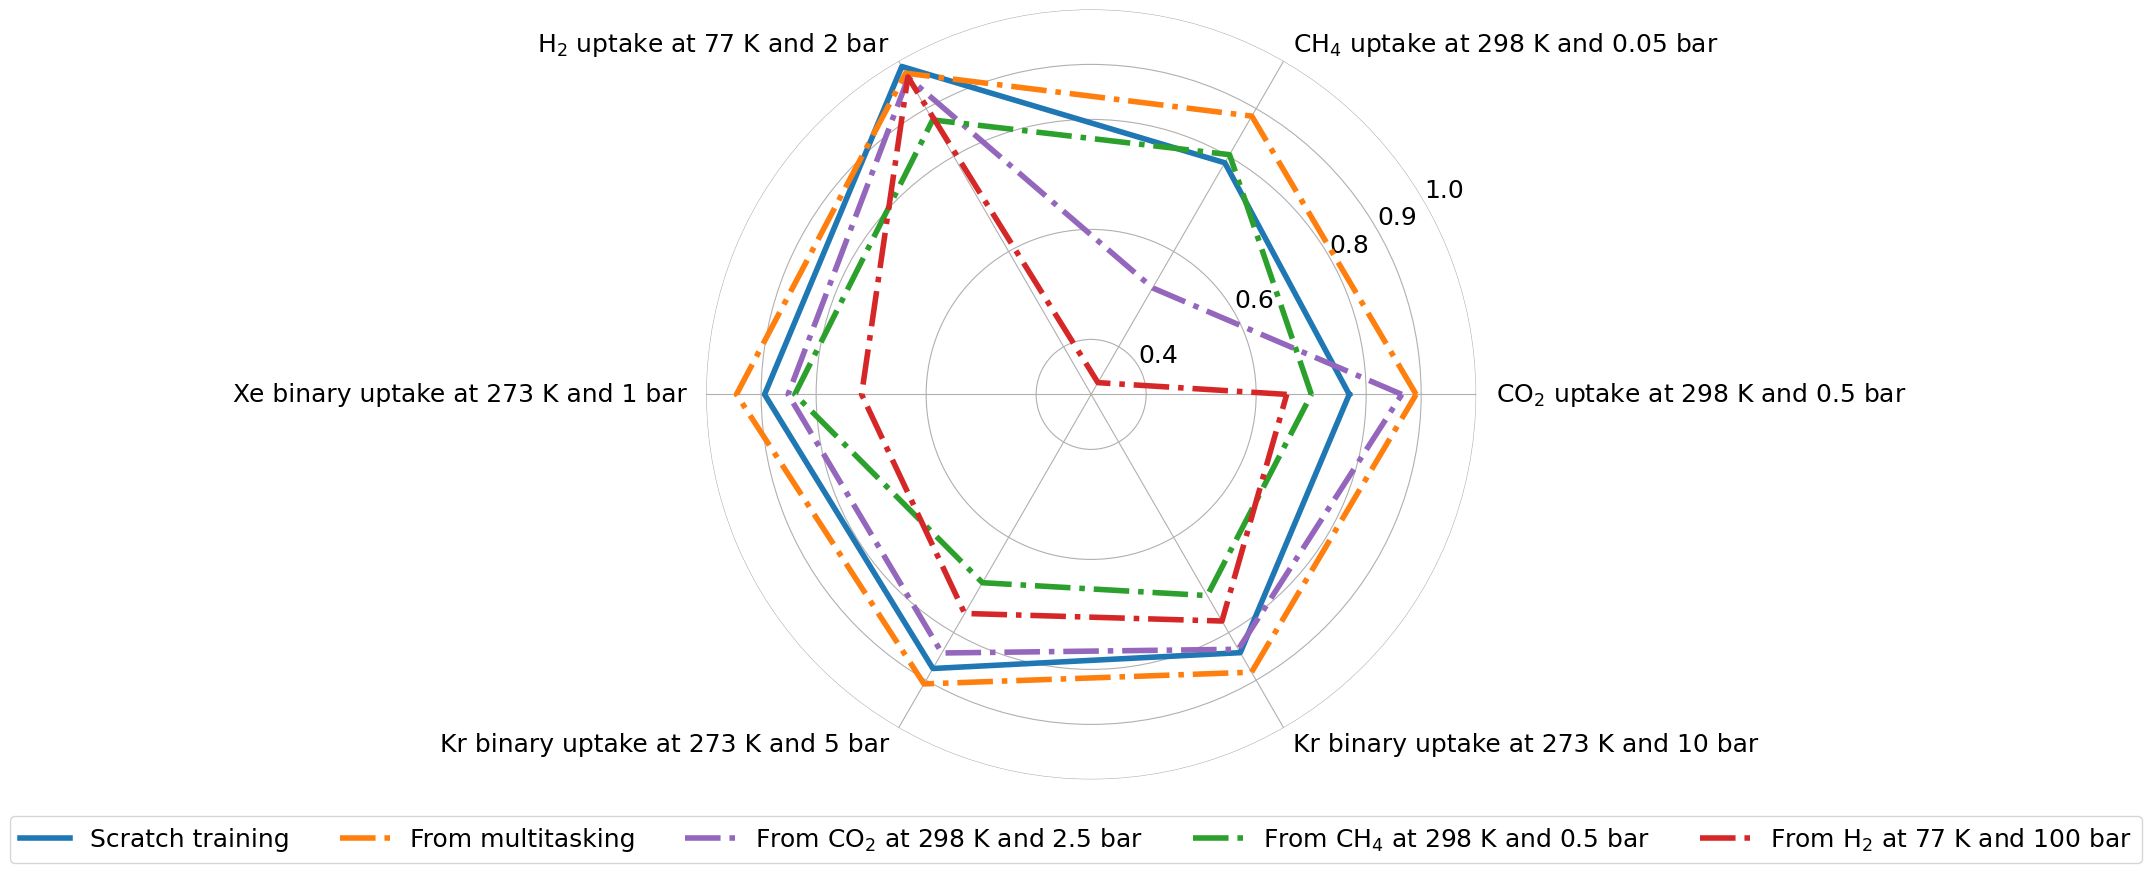

In [40]:
train_sizes = [1000]
metric = 'test_R2Score'

source_tasks = {
    'scratch': 'tab:blue',
    'multitask_geom_ads': 'tab:orange',
    'CarbonDioxide_1_298K_2.5bar_mol': 'tab:purple',
    'Methane_1_298K_0.5bar_mol': 'tab:green',
    'Hydrogen_1_77K_100bar_g': 'tab:red',
}

target_tasks = {
    'CarbonDioxide_1_298K_0.5bar_mol_kg': 'left',
    'Methane_1_298K_0.05bar_mol_kg': 'left',
    'Hydrogen_1_77K_2bar_g_l': 'right',
    'Xenon_0.2_273K_1bar_mol_kg': 'right',
    'Krypton_0.8_273K_5bar_mol_kg': 'right',
    'Krypton_0.8_273K_10bar_mol_kg': 'left',
}

with plt.style.context({'font.size': 18}):
    fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=[12, 10])
    lw = 4
    
    ax.spines['polar'].set_visible(False)
    #ax.spines['polar'].set_linewidth(lw)
    
    #ax.yaxis.grid(False)
    #ax.yaxis.set_visible(False)

    theta = list(np.linspace(0, 2 * np.pi, 6, endpoint=False))
    
    ax.set_ylim(0.3, 1)
    #ax.set_yticks([0.4, 0.6, 0.8, 0.9, 1])
    ax.set_rgrids([0.4, 0.6, 0.8, 0.9, 1], angle=30)
    
    for st, clr in source_tasks.items():
        performance = []
        
        for tt in target_tasks.keys():

            if st == 'scratch':
                results = load_json(f'../tl_experiments/from_{st}-to_{tt}/results.json')
                ls = 'solid'
            else:
                results = load_json(f'../tl_experiments/from_{st}-to_{tt}-lineval/results.json')
                ls = 'dashdot'
            
            mean = np.array([
                np.mean([results[str(size)][str(run)][0][metric] for run in range(10)])
                for size in train_sizes
            ])
    
            performance.append(mean.item())
    
        ax.plot(theta + theta[:1], performance + performance[:1], c=clr, label=pretty_labels[st], lw=lw, ls=ls)
        
    ax.set_xticks(theta, [pretty_labels[tt] for tt in target_tasks.keys()])
    ticklabels = ax.get_xticklabels()
    
    for tlbl, align in zip(ticklabels, target_tasks.values()):
        tlbl.set_ha(align)
    
    #fig.legend(loc='lower left', ncols=5)
    fig.legend(loc='center', ncols=5, bbox_to_anchor=(0.5, 0.05))
    
    #raise ValueError('Ensure consistency in hMOF colors')
    plt.savefig('figures/all_radar_plot.pdf', bbox_inches='tight')

### Tabulate results

In [140]:
train_sizes = [50, 100, 300, 500, 1000]
metric = 'test_R2Score'
metric = 'test_MeanAbsoluteError'

hMOF_target_tasks = [
    'Methane_1_298K_0.05bar_mol_kg',
    'CarbonDioxide_1_298K_0.5bar_mol_kg',
    'Hydrogen_1_77K_2bar_g_l',
    'Xenon_0.2_273K_1bar_mol_kg',
    'Krypton_0.8_273K_5bar_mol_kg',
    'Krypton_0.8_273K_10bar_mol_kg',
]

UO_target_tasks = [
    'CO2_uptake_P0.15bar_T298K [mmol_g]',
    'CO2_uptake_P0.10bar_T363K [mmol_g]',
    'CO2_binary_uptake_P0.15bar_T298K [mmol_g]',
    'N2_binary_uptake_P0.85bar_T298K [mmol_g]',
    'working_capacity_temperature_swing [mmol_g]',
    'working_capacity_vacuum_swing [mmol_g]',
    'logSelectivity',
    'excess_CO2_uptake_P0.10bar_T363K [mmol_g]',
    'excess_CO2_binary_uptake_P0.15bar_T298K [mmol_g]',
]

Tobacco_target_tasks = [
    'Xenon_0.2_298K_1bar_mmol_g',
    'Krypton_0.8_298K_1bar_mmol_g',
    'Xenon_0.2_298K_5bar_mmol_g',
    'Krypton_0.8_298K_5bar_mmol_g',
    'Methane_1_298K_65bar_cm3(STP)_cm3',
    'Methane_1_298K_100bar_cm3(STP)_cm3',
    'Methane_1_298K_6bar_cm3(STP)_cm3',
    'Methane_1_298K_6bar_kj_mol',
    'Hydrogen_1_77K_100bar_g_l',
    'Hydrogen_1_77K_6bar_g_l',
    'Hydrogen_1_130K_100bar_g_l',
    'Hydrogen_1_200K_100bar_g_l',
    'Hydrogen_1_243K_100bar_g_l',
    'Hydrogen_1_160K_5bar_g_l',
]

#target_task = 'absolute methane uptake low P [v STP_v]'
#target_task = 'absolute methane uptake high P [v STP_v]'
#target_task = 'deliverable capacity [v STP_v]'

for target_task in hMOF_target_tasks:
    table = {}
    
    for json_path in sorted(glob.glob(
        f'../tl_experiments/*to_{target_task}*/results.json'.replace(']', '[]]').replace('[', '[[]', 1)
        #f'../tl_experiments/*to_{target_task}/results.json'.replace(']', '[]]').replace('[', '[[]', 1)
        #f'../Tobacco/*to_{target_task}*/results.json'.replace(']', '[]]').replace('[', '[[]', 1)
        #f'../Tobacco_tl_experiments/*to_{target_task}*/results.json'.replace(']', '[]]').replace('[', '[[]', 1)
    ))[::-1]:

        results = load_json(json_path)
        source_task = json_path.split('-to')[0].split('/')[2].removeprefix('from_')
    
        # For UO database
        # Show the effect of augmentation in linear evaluation
        #if 'lineval' in json_path and 'multitask_final_all' not in json_path:
        #    source_task = 'multitask_final_all_augmentation'
            
        #print(json_path)
            
        ylabel = '$R^2$' if metric == 'test_R2Score' else 'MAE (uptake units)'
        ls = 'solid' if source_task == 'scratch' else 'dashdot'
        
        # Use the same number of runs for both lineval and finetune.
        n_runs = 10
        
        mean = np.array([
            np.mean([results[str(size)][str(run)][0][metric] for run in range(n_runs)]).round(3)
            for size in train_sizes
        ])

        table[pretty_labels[source_task]] = mean
        
    table = pd.DataFrame(table, index=[rf'\textbf{{{s}}}' for s in [50, 100, 300, 500, 1000]]).T
    tex_table = table.to_latex(float_format="%.3f")
    
    tex_table = tex_table.replace(' & Scratch', 'Foo & Scratch')
    tex_table = tex_table.replace(r'begin{tabular}{lrrrrr}', r'begin{tabularx}{\textwidth}{Xccccc}')
    tex_table = tex_table.replace(r'end{tabular}', r'end{tabularx}')
    x = tex_table
    tex_table = tex_table.replace(r' & \textbf{50}', rf'\textbf{{{pretty_labels[target_task]}}} & \textbf{{50}}')

    print(r'\begin{table}[!h]')
    print(tex_table, end='')
    print(
        rf'\caption[Transfer learning benchmark for {pretty_labels[target_task]}]'
        '{Scratch training represents baseline performance\n'
        'while other rows show performance when transferring knowledge from\n'
        'different source tasks. Mean $R^2$ of 10 runs is reported.}'
    )
    print(r'\end{table}', end='\n\n')

\begin{table}[!h]
\begin{tabularx}{\textwidth}{Xccccc}
\toprule
\textbf{CH$_4$ uptake at 298 K and 0.05 bar} & \textbf{50} & \textbf{100} & \textbf{300} & \textbf{500} & \textbf{1000} \\
\midrule
Scratch training & 0.034 & 0.028 & 0.025 & 0.025 & 0.021 \\
From multitasking & 0.020 & 0.016 & 0.015 & 0.014 & 0.013 \\
From CH$_4$ at 298 K and 0.5 bar & 0.024 & 0.026 & 0.023 & 0.024 & 0.024 \\
From H$_2$ at 77 K and 100 bar & 0.064 & 0.058 & 0.048 & 0.047 & 0.043 \\
From CO$_2$ at 298 K and 2.5 bar & 0.061 & 0.055 & 0.045 & 0.042 & 0.038 \\
\bottomrule
\end{tabularx}
\caption[Transfer learning benchmark for CH$_4$ uptake at 298 K and 0.05 bar]{Scratch training represents baseline performance
while other rows show performance when transferring knowledge from
different source tasks. Mean $R^2$ of 10 runs is reported.}
\end{table}

\begin{table}[!h]
\begin{tabularx}{\textwidth}{Xccccc}
\toprule
\textbf{CO$_2$ uptake at 298 K and 0.5 bar} & \textbf{50} & \textbf{100} & \textbf{300} & \textbf{5

In [138]:
len(UO_target_tasks) + len(Tobacco_target_tasks) + len(hMOF_target_tasks)

29